In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("diabetes.csv")
df.fillna(0, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


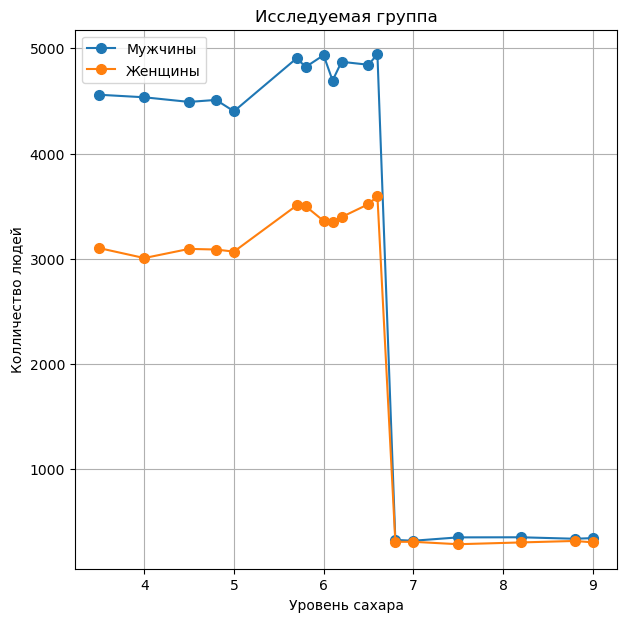

In [36]:
np_female = df[df["gender"] == "Male" ].groupby("HbA1c_level").count()[["gender"]].to_numpy()
np_male = df[df["gender"] == "Female" ].groupby("HbA1c_level").count()[["gender"]].to_numpy()

figure = plt.figure

x=np.sort(df["HbA1c_level"].unique())

plt.figure(figsize=(7,7))
plt.title("Исследуемая группа")
plt.xlabel("Уровень сахара")
plt.ylabel("Колличество людей")

plt.plot(x, np_male,label="Мужчины", marker='o', markersize=7)
plt.plot(x, np_female, label="Женщины", marker='o', markersize=7)
plt.legend(loc='upper left')
plt.grid()
plt.show()




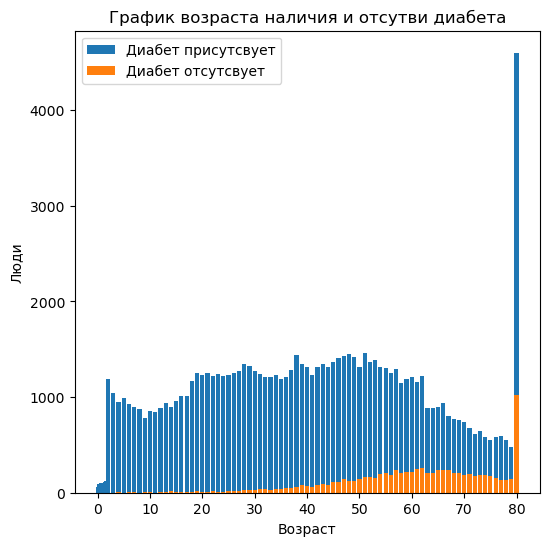

In [ ]:
df_diabets1 = df[df["diabetes"] == 0 ].groupby("age").count()[["gender"]]
df_diabets0 = df[df["diabetes"] == 1 ].groupby("age").count()[["gender"]]
plt.figure(figsize=(6,6))
x=np.sort(df["age"].unique())

# Перепишем массивы для диабетиков и без диабета, чтобы они включали все возраста
np_diabets1 = df_diabets1.reindex(x, fill_value=0).to_numpy().flatten()
np_diabets0 = df_diabets0.reindex(x, fill_value=0).to_numpy().flatten()

plt.bar(x, np_diabets1, label="Диабет присутсвует")
plt.bar(x, np_diabets0, label="Диабет отсутсвует")
plt.title("График возраста наличия и отсутви диабета")
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Возраст")

plt.ylabel("Люди")
plt.grid()
plt.show()


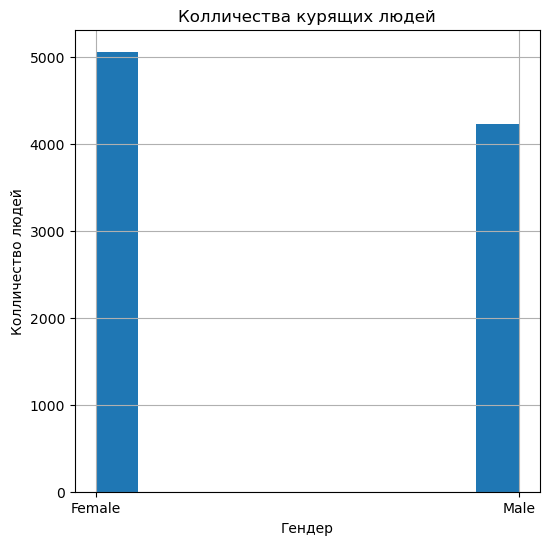

In [90]:
df_nosmoking = df[df["smoking_history"] == "current" ]

heart_disease_counts = df_nosmoking['gender']


plt.figure(figsize=(6,6))
plt.hist(heart_disease_counts)
plt.title("Колличества курящих людей")
plt.xlabel("Гендер")
plt.ylabel("Колличество людей")
plt.grid(True)

([<matplotlib.patches.Wedge at 0x20092cbafd0>,
 [Text(0.870791087575604, 0.6721033267280389, 'Курящие'),
  Text(-0.8707911190390307, -0.672103285963365, 'не курящие')],
 [Text(0.4749769568594203, 0.3666018145789302, '20.9%'),
  Text(-0.4749769740212894, -0.3666017923436536, '79.1%')])

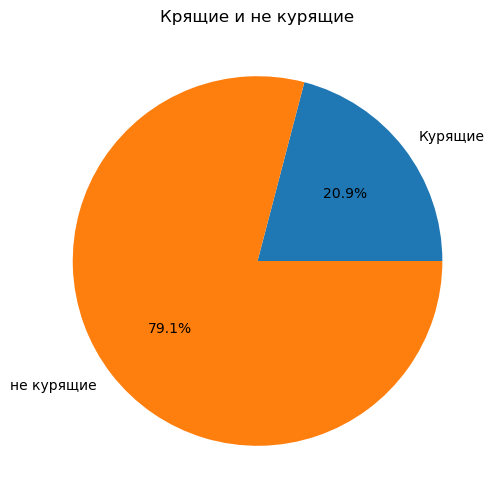

In [82]:
df_smoking = df[df["smoking_history"] == "current" ].groupby("age").count()[["gender"]]
df_nosmoking = df[df["smoking_history"] == "never" ].groupby("age").count()[["gender"]]


smoking_count = df_smoking["gender"].sum() 
nosmoking_count = df_nosmoking["gender"].sum()
sizes = [smoking_count, nosmoking_count]



plt.figure(figsize=(6,6))
plt.title("Крящие и не курящие")
plt.pie(sizes,labels=["Курящие", "не курящие"], autopct="%1.1f%%")

Text(0, 0.5, 'amount of people')

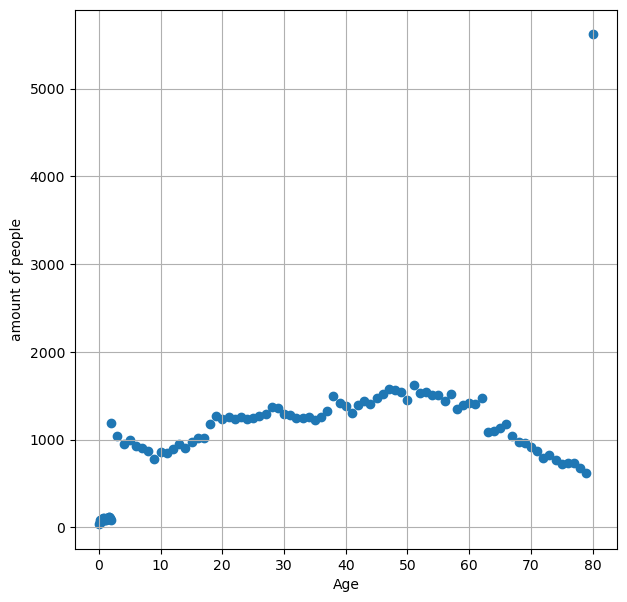

In [89]:
plt.figure(figsize=(7,7))
x=np.sort(df["age"].unique())
y = df.groupby("age").count()[["diabetes"]].to_numpy()
plt.scatter(x,y)
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("amount of people")